In [1]:
import hierarchy as hrcy
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib

font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

**Base Model**

An example were no types 0 are hired. The system should we overtaken by types 1.

In [4]:
capacities = [4, 3, 2, 1]
mu = [[1, 1], [2, 2], [2, 2], [1, 1]]
lmbda = [0, 1]
r = 1.5
max_transitions = 1000
seed = 1

In [5]:
states = list(hrcy.states.get_states(capacities))
stationary_vector = hrcy.get_stationary_distribution(
    capacities=capacities,
    r=r,
    lmbda=lmbda,
    mu=mu,
)

In [6]:
index = np.argmax(stationary_vector)
states[index]

((0, 3), (0, 3), (0, 2), (1, 0))

In [7]:
output = list(
        hrcy.simulation.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
history, dates = map(list, zip(*output))

In [8]:
history[-1]

array([[0., 3.],
       [0., 3.],
       [0., 2.],
       [1., 0.]])

In [9]:
similarity_ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(instance) for instance in history]

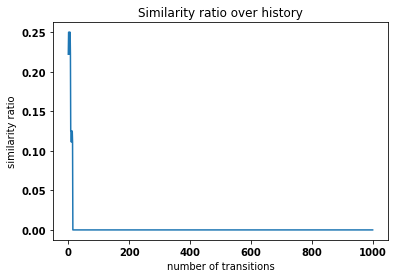

In [10]:
plt.plot(similarity_ratios)

plt.ylabel('similarity ratio')
plt.xlabel('number of transitions')
plt.title('Similarity ratio over history');

An example were no types 1 are hired. The system should we overtaken by types 0.

In [16]:
lmbda = [1, 0]

In [17]:
stationary_vector = hrcy.get_stationary_distribution(
    capacities=capacities,
    r=r,
    lmbda=lmbda,
    mu=mu,
)

In [18]:
index = np.argmax(stationary_vector)
states[index]

((3, 0), (3, 0), (2, 0), (1, 0))

In [21]:
output = list(
        hrcy.simulation.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
history, dates = map(list, zip(*output))

In [22]:
history[-1]

array([[3., 0.],
       [3., 0.],
       [2., 0.],
       [1., 0.]])

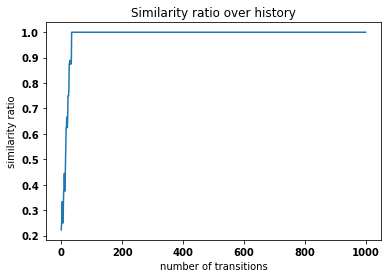

In [23]:
similarity_ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(instance) for instance in history]
plt.plot(similarity_ratios)

plt.ylabel('similarity ratio')
plt.xlabel('number of transitions')
plt.title('Similarity ratio over history');

**simple example**

In [24]:
capacities = [4, 3, 2, 1]
mu = [[1, 1], [2, 2], [2, 2]]
lmbda = [1, 1]
r = 1.5
max_transitions = 2000
seed = 1

In [26]:
stationary_vector = hrcy.get_stationary_distribution(
    capacities=capacities,
    r=r,
    lmbda=lmbda,
    mu=mu,
)

In [27]:
index = np.argmax(stationary_vector)
states[index]

((0, 3), (2, 1), (2, 0), (1, 0))

In [28]:
hrcy.measures.get_ratio_of_types_zero_in_state(states[index])

0.5

In [29]:
output = list(
        hrcy.simulation.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
history, dates = map(list, zip(*output))

In [31]:
similarity_ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(instance) for instance in history]

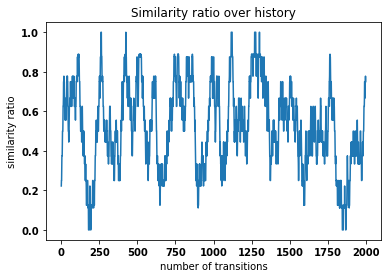

In [32]:
plt.plot(similarity_ratios)

plt.ylabel('similarity ratio')
plt.xlabel('number of transitions')
plt.title('Similarity ratio over history');

In [40]:
rs = np.linspace(1, 5, 10)

stationary_vectors = []
for r_val in rs:
    stationary_vector = hrcy.get_stationary_distribution(
        capacities=capacities,
        r=r_val,
        lmbda=lmbda,
        mu=mu,
    )
    stationary_vectors.append(stationary_vector)

In [41]:
potential_states = list(hrcy.states.get_states(capacities))

In [42]:
indices = []
for vector in stationary_vectors:
    index = np.argmax(vector)
    indices.append(index)

In [43]:
ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(potential_states[index]) for index in indices]

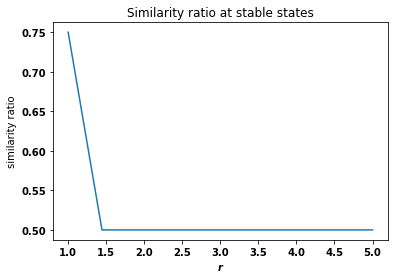

In [45]:
plt.plot(rs, ratios);

plt.ylabel('similarity ratio')
plt.xlabel('$r$')
plt.title('Similarity ratio at stable states');

**Another example**

In [51]:
capacities = [4, 2, 2, 1]
mu = [[1, 1], [2, 2], [2, 2]]
lmbda = [1, 1]
r = 1.5

rs = np.linspace(1, 5, 10)

stationary_vectors = []
for r_val in rs:
    stationary_vector = hrcy.get_stationary_distribution(
        capacities=capacities,
        r=r_val,
        lmbda=lmbda,
        mu=mu,
    )
    stationary_vectors.append(stationary_vector)

In [52]:
potential_states = list(hrcy.states.get_states(capacities))

In [53]:
indices = []
for vector in stationary_vectors:
    index = np.argmax(vector)
    indices.append(index)

In [54]:
ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(potential_states[index]) for index in indices]

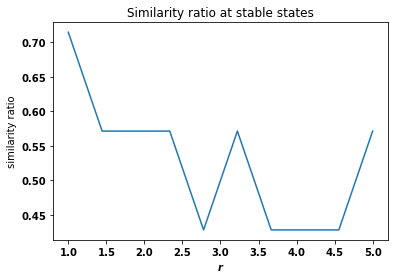

In [55]:
plt.plot(rs, ratios);

plt.ylabel('similarity ratio')
plt.xlabel('$r$')
plt.title('Similarity ratio at stable states');

**large system**

In [67]:
capacities =[6, 4, 3, 2, 1]
r = 1.5
lmbda = [1, 1]
seed = 2
mu = [[1 for _ in range(2)] for _ in capacities]

max_transitions = 6000

In [68]:
output = list(
        hrcy.simulation.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
history, dates = map(list, zip(*output))

In [69]:
similarity_ratios = [hrcy.measures.get_ratio_of_types_zero_in_state(instance) for instance in history]

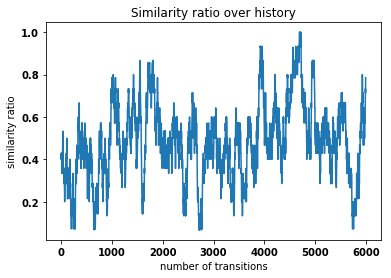

In [70]:
plt.plot(similarity_ratios)

plt.ylabel('similarity ratio')
plt.xlabel('number of transitions')
plt.title('Similarity ratio over history');

In [71]:
potential_states = list(hrcy.states.get_states(capacities))

In [72]:
initial_state = potential_states[0]

In [73]:
stationary_vectors = []
seed = 0

for i in np.linspace(1, 5, 10):
    max_transitions = 6000
    number_of_repetitions = 10

    simulated_stationary_vector = hrcy.simulation.get_simulated_stationary_vector(
        capacities=capacities,
        r=i,
        lmbda=lmbda,
        mu=mu,
        max_transitions=max_transitions,
        number_of_repetitions=number_of_repetitions,
        seed=seed,
        initial_state=initial_state
    )
    

    stationary_vectors.append(simulated_stationary_vector)

In [75]:
stable_state_indices = [np.argmax(stationary_vector) for stationary_vector in stationary_vectors]
stable_states = [potential_states[stable_state_index] for stable_state_index in stable_state_indices]
similarity_ratio_at_stable_states = [hrcy.measures.get_ratio_of_types_zero_in_state(stable_state)
                                     for stable_state in stable_states]

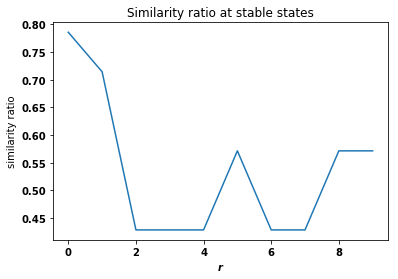

In [76]:
plt.plot(similarity_ratio_at_stable_states);

plt.ylabel('similarity ratio')
plt.xlabel('$r$')
plt.title('Similarity ratio at stable states');

**Competence Model**

**simple example**

In [83]:
competence_distribution = scipy.stats.uniform(0, 1)
retirement_rate = 0.4
capacities = [6, 5, 5, 4, 2, 1]
last_retirement = 0
lmbda = [1, 1]
Gamma = 5
max_transitions = 5000
seed = 0

In [84]:
output = list(
    hrcy.simulation.get_competence_simulated_history(
        capacities=capacities,
        lmbda=lmbda,
        competence_distribution=competence_distribution,
        retirement_rate=retirement_rate,
        Gamma=Gamma,
        max_transitions=max_transitions,
        initial_state=None,
        seed=seed,
    )
)

In [85]:
history, retirement_dates = map(list, zip(*output))

In [86]:
competence = [hrcy.measures.get_state_competence(state) for state in history[1:]]

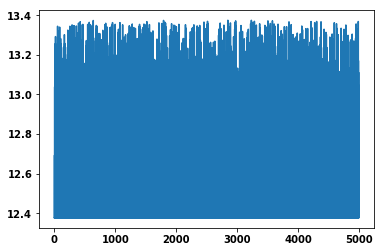

In [89]:
plt.plot(competence);